In [142]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV

In [143]:
# df = pd.read_csv('currency.csv', header=0, names=['date', 'labels'])
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['week_day'] = df['date'].dt.dayofweek
# df['labels'] = np.log(df['labels'])
# for i in range(1, 8):
#     df[f'lag_{i}'] = df['labels'].shift(i)
#     df[f'lag_{i}'] = df[f'lag_{i}'].fillna(df[f'lag_{i}'].mean())


In [144]:
df = pd.read_csv('currency.csv', header=0, names=['date', 'labels'])
# df['labels'] = np.sin(np.linspace(0, 100, df.shape[0]))
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['week_day'] = df['date'].dt.dayofweek
for i in range(1, 8):
    df[f'lag_{i}'] = df['labels'].shift(i)
    df[f'lag_{i}'] = df[f'lag_{i}'].fillna(df[f'lag_{i}'].mean())
df

,date,labels,year,month,day,week_day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2017-05-01,1199436,2017,5,1,0,1.347008e+06,1.344405e+06,1.341607e+06,1.340895e+06,1.338096e+06,1.334491e+06,1.333187e+06
1,2017-05-02,1045515,2017,5,2,1,1.199436e+06,1.344405e+06,1.341607e+06,1.340895e+06,1.338096e+06,1.334491e+06,1.333187e+06
2,2017-05-03,586111,2017,5,3,2,1.045515e+06,1.199436e+06,1.341607e+06,1.340895e+06,1.338096e+06,1.334491e+06,1.333187e+06
3,2017-05-04,856601,2017,5,4,3,5.861110e+05,1.045515e+06,1.199436e+06,1.340895e+06,1.338096e+06,1.334491e+06,1.333187e+06
4,2017-05-05,793775,2017,5,5,4,8.566010e+05,5.861110e+05,1.045515e+06,1.199436e+06,1.338096e+06,1.334491e+06,1.333187e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018-02-20,2166449,2018,2,20,1,2.398088e+06,1.716590e+06,2.119260e+06,2.090271e+06,1.324588e+06,1.707899e+06,1.842610e+06
296,2018-02-21,1552313,2018,2,21,2,2.166449e+06,2.398088e+06,1.716590e+06,2.119260e+06,2.090271e+06,1.324588e+06,1.707899e+06
297,2018-02-22,2175548,2018,2,22,3,1.552313e+06,2.166449e+06,2.398088e+06,1.716590e+06,2.119260e+06,2.090271e+06,1.324588e+06
298,2018-02-23,2122606,2018,2,23,4,2.175548e+06,1.552313e+06,2.166449e+06,2.398088e+06,1.716590e+06,2.119260e+06,2.090271e+06


In [145]:
X = df.drop(columns=['date', 'labels'])
X = df.drop(columns=['date'])
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)
# X_test, X_true, y_train, y_test = train_test_split(X_test, y_test, test_size=10, random_state=42, shuffle=False)

In [149]:
H = 60
models = []
for h in range(1, H + 1):
#     regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 2, 4, 5])
    regr.fit(X_train.iloc[:-h], y_train.shift(-h)[:-h])
    models.append(regr)

In [150]:
y_pred = [models[0].predict(X_train.iloc[[-1]])]
for h in range(1, H):
#     y_pred.append(models[0].predict(X_test.iloc[[h-1]]))
    y_pred.append(models[h].predict(X_train.iloc[[-1]]))
y_pred = np.array(y_pred).flatten()

In [151]:
# y_pred1 = [models[0].predict(X_train.iloc[[-1]])]
# for h in range(1, H):
#     y_pred1.append(models[0].predict(X_test.iloc[[h-1]]))
# y_pred1 = np.array(y_pred1).flatten()

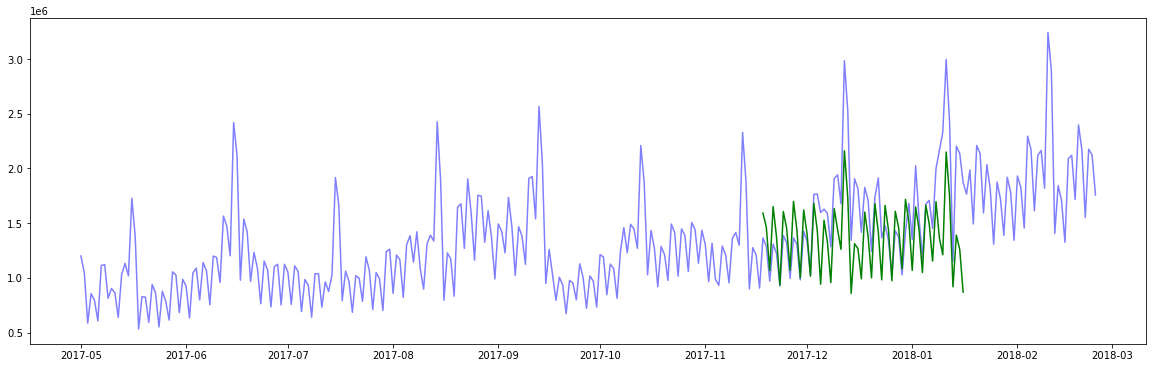

In [152]:
plt.figure(figsize=(20, 6))
plt.plot(df['date'], df['labels'], alpha=0.5, c='b')
# plt.plot(df['date'][y_test[:H].index], y_test[:H], c='b')
plt.plot(df['date'][y_test[:H].index], y_pred, c='g')
# plt.plot(df['date'][y_test[:H].index], y_pred1, c='r')

# regr = RandomForestRegressor(max_depth=5, random_state=0)
# regr.fit(X_train, y_train)
# y_pred1 = regr.predict(X_test.iloc[:H])
# plt.plot(df['date'][y_test[:H].index], y_pred1)